In [205]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly as px
import plotly.graph_objects as go 
import plotly.express as px

from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB

import warnings
warnings.filterwarnings('ignore')

In [206]:
data=pd.read_csv("PassengerSatisfaction.csv")

data.sample(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
16153,16153,8214,Female,Loyal Customer,40,Business travel,Eco,130,2,3,...,2,1,4,3,2,4,2,0,0.0,neutral or dissatisfied
11127,11127,116199,Female,Loyal Customer,31,Personal Travel,Eco,417,3,1,...,1,1,4,2,4,3,1,38,28.0,neutral or dissatisfied
66358,66358,105170,Male,Loyal Customer,70,Personal Travel,Eco,289,2,4,...,1,5,4,4,5,4,1,2,0.0,neutral or dissatisfied


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [208]:
print(data.dtypes)
print("--------------------")
print(data.dtypes.value_counts())

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [209]:
def controlNaNvalues(data):
    print("-----\n")
    x=(data.isna().sum())/(data.shape[0])
    df=pd.DataFrame({'Bos_Sutunların_oranı': x})
    return df

null_df=controlNaNvalues(data)
null_df

#Arrival Delay in Minutes=310

-----



,Bos_Sutunların_oranı
Unnamed: 0,0.000000
id,0.000000
Gender,0.000000
Customer Type,0.000000
Age,0.000000
Type of Travel,0.000000
Class,0.000000
Flight Distance,0.000000
Inflight wifi service,0.000000
Departure/Arrival time convenient,0.000000


In [210]:
#Boş verileri sil
data = data.dropna(subset="Arrival Delay in Minutes",axis=0)
controlNaNvalues(data)

-----



,Bos_Sutunların_oranı
Unnamed: 0,0.0
id,0.0
Gender,0.0
Customer Type,0.0
Age,0.0
Type of Travel,0.0
Class,0.0
Flight Distance,0.0
Inflight wifi service,0.0
Departure/Arrival time convenient,0.0


In [211]:
#Her kolondaki kaç farklı veri tipine sahip
unique_counts = data.nunique().reset_index()
unique_counts.columns = ['Kolon', 'Farklı Veri Sayısı']

# Sonuçları gösterme
unique_counts

,Kolon,Farklı Veri Sayısı
0,Unnamed: 0,103594
1,id,103594
2,Gender,2
3,Customer Type,2
4,Age,75
5,Type of Travel,2
6,Class,3
7,Flight Distance,3802
8,Inflight wifi service,6
9,Departure/Arrival time convenient,6


In [212]:
#Gereksiz Kolonlardan kurtulma
data=data.drop(["Unnamed: 0","id"],axis=1)
data.tail(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


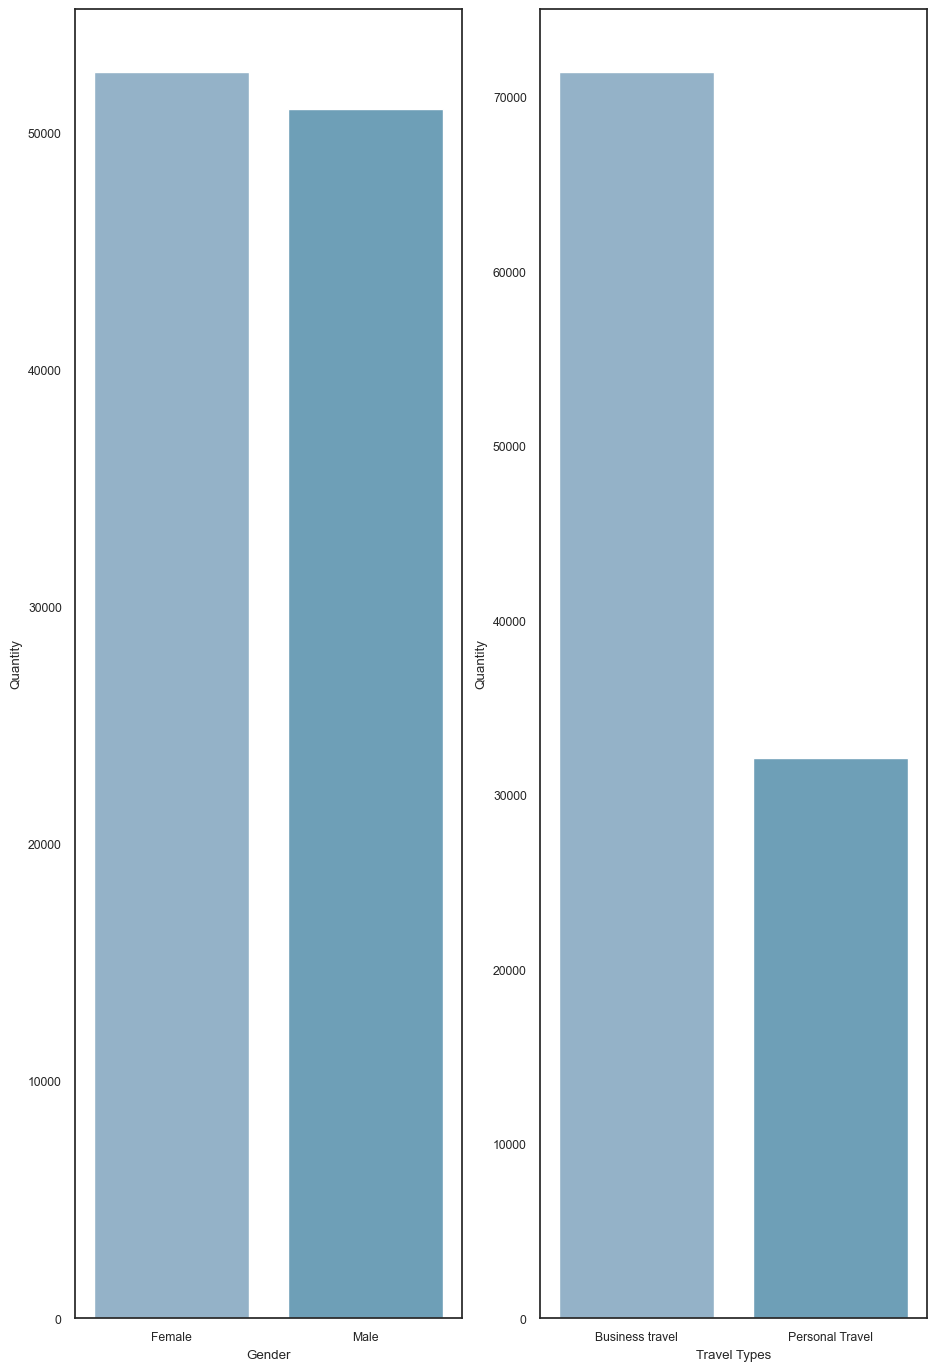

In [213]:
#Tipi "Object" kolonlara odaklanalım çünkü öncesinde bu sutünları convert edceğiz.

Gender=data["Gender"].value_counts()
Travel=data["Type of Travel"].value_counts()


plt.figure(figsize=(17,17))

plt.subplot(1,3,1)
sns.barplot(x=Gender.index,y=Gender.values)
plt.xlabel("Gender")
plt.ylabel("Quantity")



plt.subplot(1,3,2)
sns.barplot(x=Travel.index,y=Travel.values)
plt.xlabel("Travel Types")
plt.ylabel("Quantity")
plt.show()



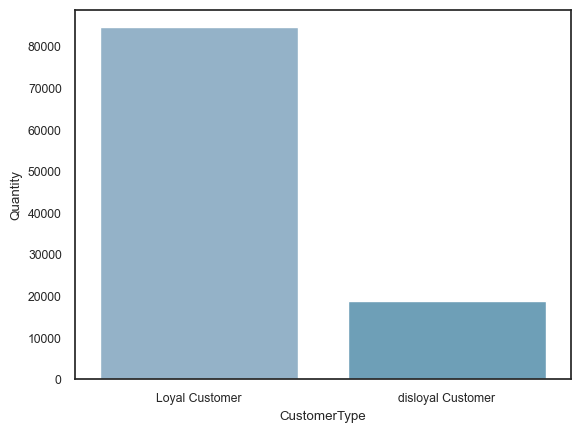

In [214]:
#Customer Type 

Customer=data["Customer Type"].value_counts()

sns.barplot(x=Customer.index,y=Customer.values)
plt.xlabel("CustomerType")
plt.ylabel("Quantity")
plt.show()

In [215]:
#Class Type

Class=data["Class"].value_counts()

fig=px.bar(x=Class.index,y=Class.values,color=Class.values,text=Class.index)

fig.layout.title.text= 'Bar Plot for Class Type '
fig.update_traces(textposition='outside')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [216]:
#Of course, target column, we have to know that it's imbalance dataset or not !

target=data["satisfaction"].value_counts()


colors=['#8BC34A','#D4E157','#FFB300','#FF7043',"#E43D3D","#A1A1A1"]

donut=go.Pie(values = target.values , labels=target.index , marker=dict(colors=colors), textinfo='label+percent' , hole=0.6 , pull= [0,0.1] )

layout=go.Layout(title=dict(text='Quantity of Satisfaction ', x=.50,y=.90,font_size=30))

fig=go.Figure(data=donut,layout=layout)

fig.show()

## Bivariate Analysis

<Figure size 1000x1000 with 0 Axes>

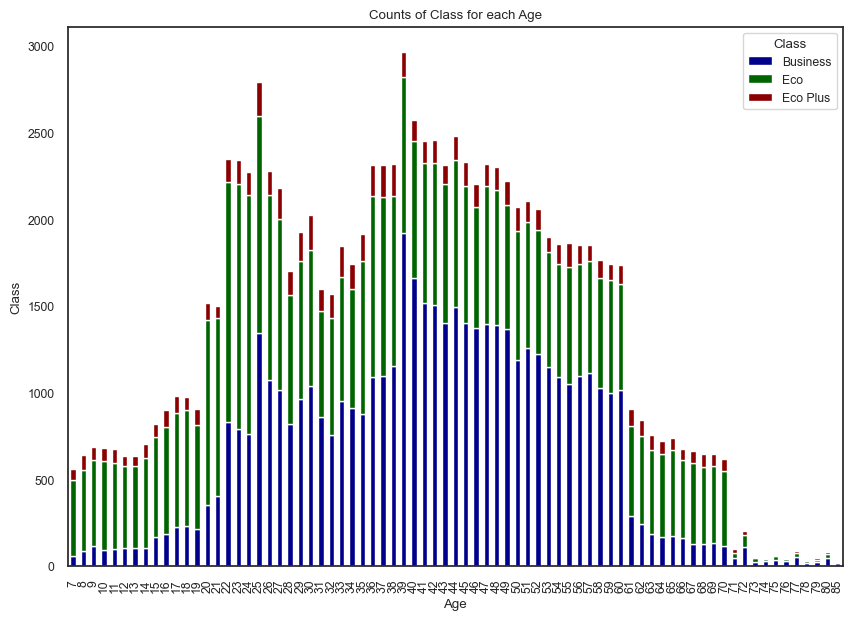

In [217]:
order=data.groupby('Class')["Age"].value_counts()

order_df=order.reset_index(name='count')


pivot_df = order_df.pivot(index='Age', columns='Class', values='count')

# Replace NaNs with 0
pivot_df = pivot_df.fillna(0)

colors = ['darkblue', 'darkgreen', 'darkred']

plt.figure(figsize=(10,10))
# Create the stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(10,7),color=colors)

plt.title('Counts of Class for each Age')
plt.ylabel('Class')
plt.xlabel('Age')

plt.show()

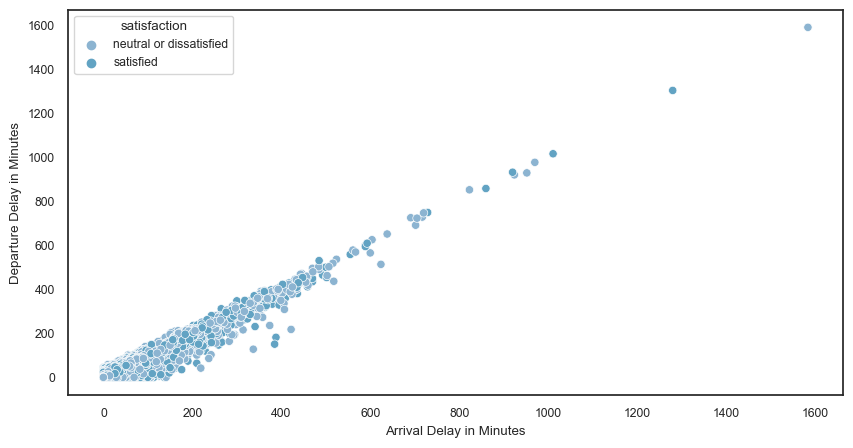

In [218]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=data['Arrival Delay in Minutes'],y=data['Departure Delay in Minutes'],hue=data["satisfaction"])
plt.show()

<Axes: xlabel='Flight Distance', ylabel='Count'>

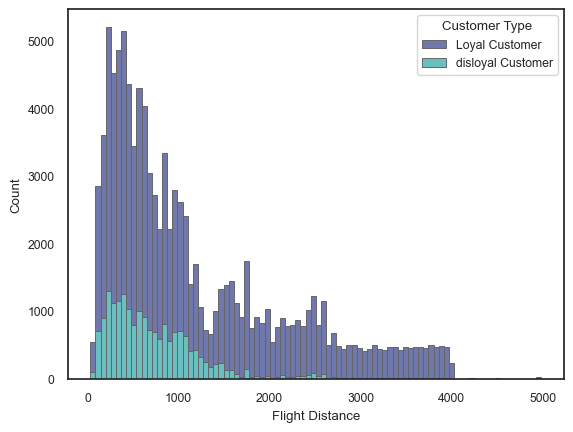

In [219]:
sns.histplot(data, x = "Flight Distance", hue = "Customer Type", multiple = "stack", palette = "mako", edgecolor = ".4", linewidth = .7, )

Şimdi Object sutunları tiplerini değiştireceğiz ancak sadece TARGET sutununa LABEL-ENCODER uygulacağız.

In [220]:
#Object sutunlarımız : Gender, Customer Type,Type of Travel,Class
def GenderConvert(x):
    if x=="Male":
        return 1
    else:
        return 0
    
def Customer_TypeCovnert(x):
    if x=="Loyal Customer":
        return 1
    else:
        return 0
    
def Type_of_Travel(x):
    if x=="Business travel":
        return 1
    else:
        return 0
    
def ClassConvert(x):
    if x=="Business":
        return 2
    elif x=="Eco Plus":
        return 1
    else:
        return 0
    
#Dönüşümler
data["Gender"]=data["Gender"].apply(GenderConvert)
data["Customer Type"]=data["Customer Type"].apply(Customer_TypeCovnert)
data["Type of Travel"]=data["Type of Travel"].apply(Type_of_Travel)
data["Class"]=data["Class"].apply(ClassConvert)

In [221]:
#Label Encoder for only target
label_encoder = preprocessing.LabelEncoder()
data['satisfaction']= label_encoder.fit_transform(data['satisfaction'])

In [222]:
data.sample(7)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
75226,1,0,24,1,0,859,3,3,3,3,...,1,4,5,5,4,5,1,0,0.0,0
92939,0,1,29,1,2,2327,3,5,5,5,...,3,3,1,3,3,4,3,115,103.0,0
18199,0,1,41,1,0,733,4,4,4,4,...,4,3,2,1,1,5,4,0,0.0,1
57632,0,1,70,0,1,980,2,3,2,3,...,2,2,2,2,1,2,1,0,0.0,0
48684,0,1,47,1,2,471,5,2,2,2,...,5,5,4,5,2,5,2,33,26.0,0
70363,1,1,25,1,2,1899,2,2,2,2,...,3,3,4,5,3,5,3,35,13.0,1
3747,1,1,52,1,2,2565,4,4,4,4,...,4,4,4,4,5,4,5,9,7.0,1


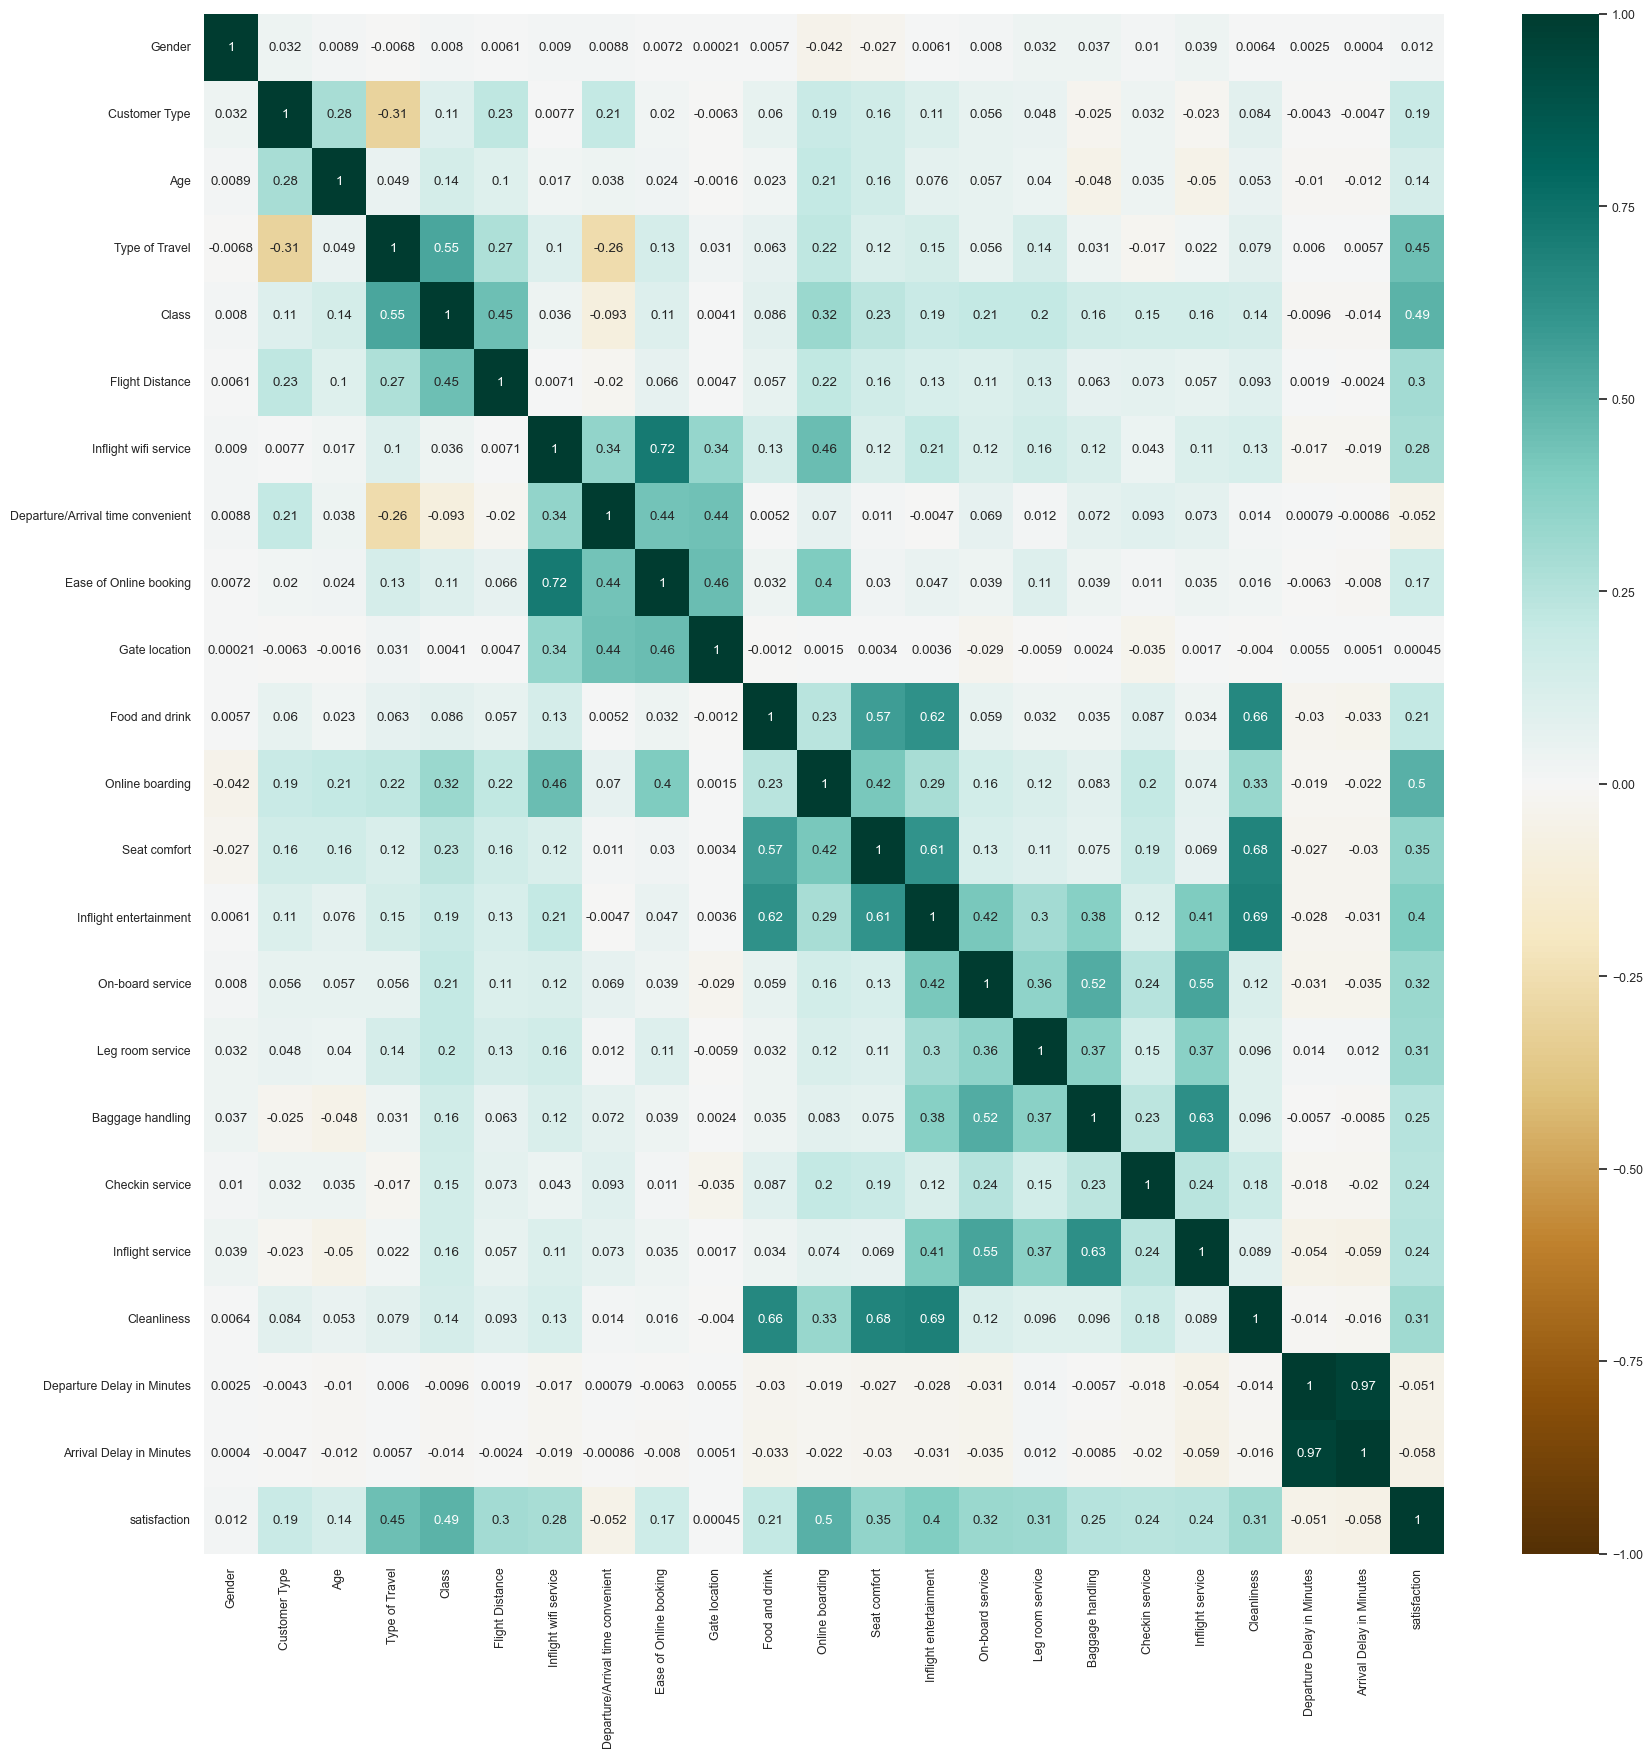

In [223]:
def Corr(data):
    plt.figure(figsize=(20,20))
    heatmap=sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True,cmap="BrBG")
    plt.show()

Corr(data)

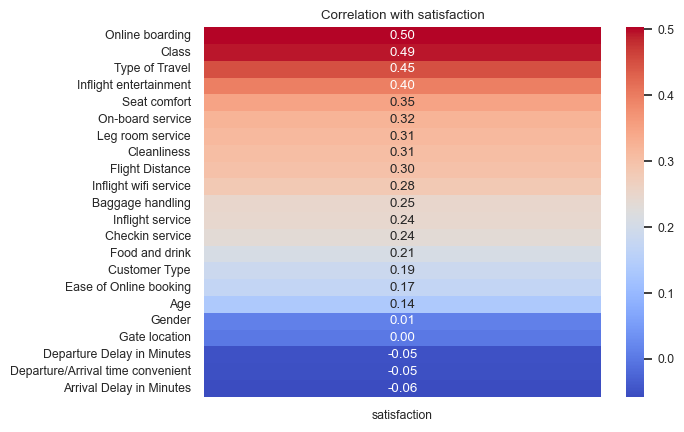

In [224]:
# Compute the correlation matrix
data2=data.copy()
correlation_matrix = data2.corr()
corr = data2.corr()
target_corr = corr['satisfaction'].drop('satisfaction')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with satisfaction')
plt.show()

#### Pipeline oluşturma (Basic)
##### Logistic Regression - Bernoulli Naive Bayes

In [225]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


pip1=make_pipeline(StandardScaler(),LogisticRegression())

Train-Test Split


In [226]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,:-1].values
y=data.iloc[:,-1:].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [227]:
pip1.fit(X_train,y_train)

y_pred = pip1.predict(X_test)


In [228]:
def vis_report_classification(y_hat_xgboost,y_test):
    from sklearn.metrics import classification_report

    df = pd.DataFrame(classification_report(y_hat_xgboost, 
                                        y_test, digits=2,
                                        output_dict=True)).T

    df['support'] = df.support.apply(int)

    
    

    return df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

vis_report_classification(y_pred,y_test)

,precision,recall,f1-score,support
0,0.903031,0.873722,0.888134,24248
1,0.829671,0.867656,0.848238,17190
accuracy,0.871205,0.871205,0.871205,0
macro avg,0.866351,0.870689,0.868186,41438
weighted avg,0.872598,0.871205,0.871584,41438


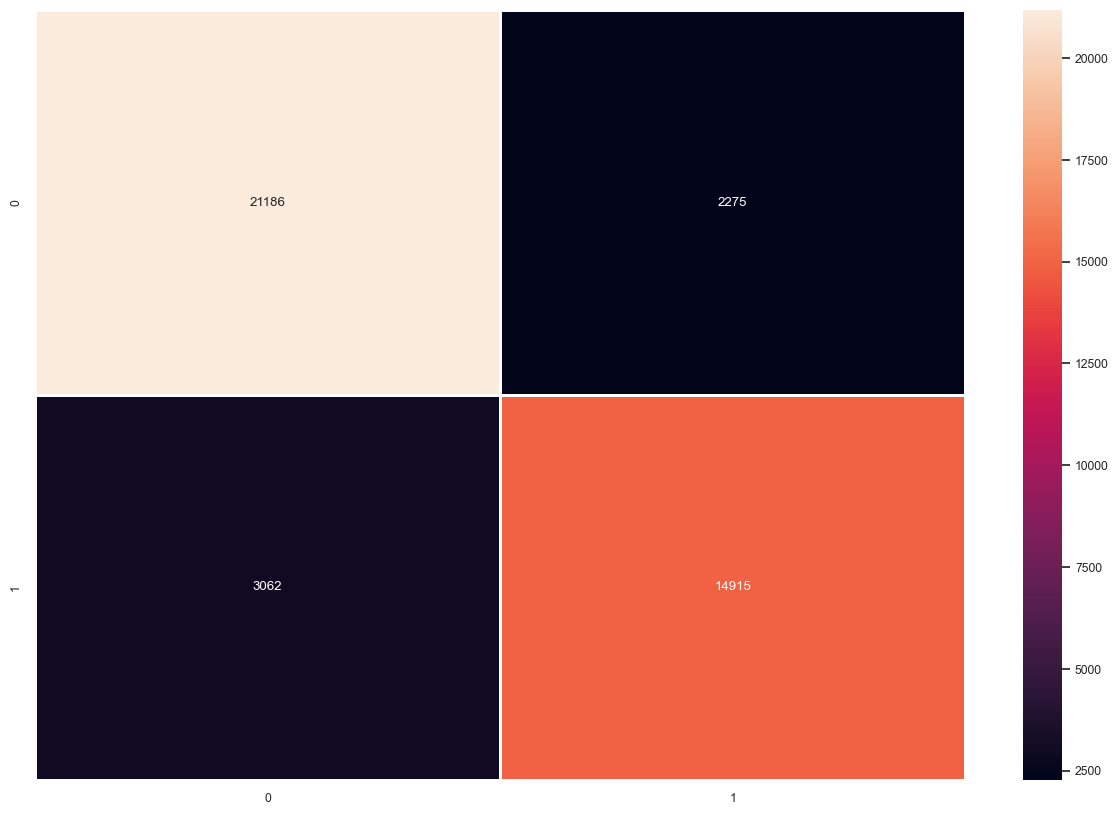

In [229]:
def matrix_confusion(y_test,y_hat):
    from sklearn.metrics import confusion_matrix

    cf_matrix = confusion_matrix(y_test,y_hat)
    fig, ax = plt.subplots(figsize=(15,10)) 
    sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')
    plt.show()

matrix_confusion(y_test, y_pred)

In [230]:
#Bernoulli Naive Bayes
clf = BernoulliNB()
clf.fit(X_train,y_train)


BernoulliNB()

In [231]:
bern_pred=clf.predict(X_test)

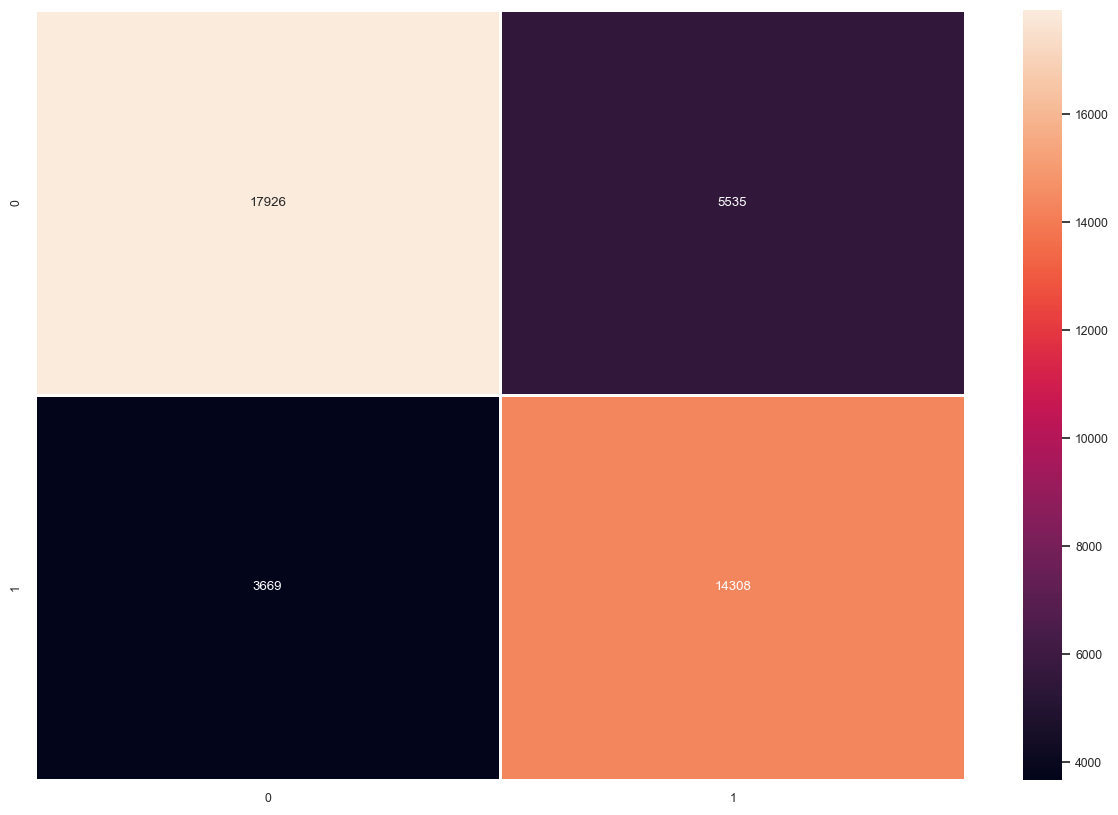

In [232]:
def matrix_confusion(y_test,y_hat):
    from sklearn.metrics import confusion_matrix

    cf_matrix = confusion_matrix(y_test,y_hat)
    fig, ax = plt.subplots(figsize=(15,10)) 
    sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')
    plt.show()

matrix_confusion(y_test, bern_pred)

In [233]:
vis_report_classification(y_test, bern_pred)

,precision,recall,f1-score,support
0,0.830100,0.764077,0.795721,23461
1,0.721060,0.795906,0.756637,17977
accuracy,0.777885,0.777885,0.777885,0
macro avg,0.775580,0.779991,0.776179,41438
weighted avg,0.782795,0.777885,0.778765,41438


In [234]:
#Done!